<img src="https://www.digitalvidya.com/wp-content/uploads/2013/05/Digital-Vidya-Website-Logo-HD-2-300x95.png">

# Database

### Why should we learn database in Python course?
Considering that Python is used for a  variety of tasks, it is very useful to learn on how to work with databases using Python. This will also give an interesting insight on the power of both Python and SQL to work with data and perform some basic data anlysis.

### How to query a database?
In order to query a database we need to use Structured Query Language (SQL)
<br>Sources to learn SQL - MySQL docs (https://dev.mysql.com/doc/refman/8.0/en/)
<br>Digital Vidya SQL fundamentals (To be launched by Oct' 18)

### Summary about databases:
A database is a collection of information that is organized so that it can be easily accessed, managed and updated.

Data is organized into rows, columns and tables, and it is indexed to make it easier to find relevant information. Data gets updated, expanded and deleted as new information is added. Databases process workloads to create and update themselves, querying the data they contain and running applications against it.
A database is an organized collection of data, stored and accessed electronically. 

Companies store data in databases of various forms - Structured and unstructured.

## Structured way

<br> The older Database management systems (DBMS) used tabular way of storing data which is structured way.
<br> In order to access data from these databases MySQL is used.

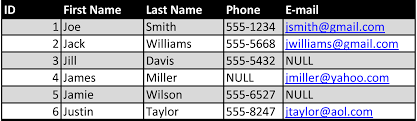

## Unstructured way 

While in the newer databases, unstructured way of storing data is used. (Key-value pair)
```json
{
"employee" : 
    {
    "userId":"rirani",
    "jobTitleName":"Developer",
    "firstName":"Romin",
    "lastName":"Irani",
    "preferredFullName":"Romin Irani",
    "employeeCode":"E1",
    "region":"CA",
    "phoneNumber":"408-1234567",
    "emailAddress":"romin.k.irani@gmail.com"
    }
}
```

In order to access JSON data from database, NoSQL is used.

### Terminologies used:

Database - consists of many tables
<br>Table - consists of many rows and columns
<br>varchar(n) - String of n characters.
<br>Decimal(n,p) - Floating point number with n digits before decimal point and p digits after decimal point.
<br>\`\` - It is used to enclose column names so that they would not be confused.
For example column name as "Student Name". Here there is space between "Student" and "Name" so we will use \`Student Name\`.

<font color=orange>### IMPORTANT NOTE </font>
<br> SQL is a case insensitive language. You can write in lower case as well as uppercase characters.
<br> Obviousy, this doesn't apply for column names.

## Approach to this tutorial :
###  Why MySQL?
MySQL is a relational database management system based on SQL – Structured Query Language. 

The most common use for MySQL is for the purpose of a web database. It can be used to store anything from a single record of information to an entire inventory of available products for an online store.

In association with a scripting language such as PHP or Perl or Python it is possible to create websites which will interact in real-time with a MySQL database to rapidly display categorized and searchable information to a website user.

MySQL is free to use.

We need a MySQL server to use MySQL DB, here we will be making use of localhost.
<br> In real time applications, hosting service needs to be purchased where the DB will be hosted.

### Connection and setting up of MySQL:

Download and install MySQL connector
<br> For anaconda use command **conda install -c anaconda mysql-connector-python**

1. install xampp
    https://www.apachefriends.org/download.html
    Using this link install the right version of xampp for you operating system
    
2. After installation start apache and MySQL
    ![](https://i.snag.gy/wxzH8p.jpg)
    
3. Open the browser and type localhost/phpmyadmin

    ![](https://i.snag.gy/xMJKjZ.jpg)

# Database creation

Database cannot be created by writing code.
<br>It needs to be manually created in the phpmyadmin console. (http://localhost/phpmyadmin)

Keep the default setting during creation of database. Just give it a name that you can remember.

The module we will be using for using MySQL to access DB is pyMySQL.
<br> To install it use https://anaconda.org/anaconda/pyMySQL

In [46]:
import pyMySQL.cursors

In [47]:
class connection:
    
    def __init__(self, host, port, user, db):
        self.host = host
        self.port = port 
        self.user = user
        self.db= db       
        
    def connect(self):
        return pyMySQL.connect(host= self.host,
                                 port = self.port, 
                                 user = self.user,
                                 db= self.db)

In [48]:
## In all the functions below, this object is passed

c = connection('localhost', 3306,  'root', 'dietary composition')

We have created a connection class and we will create an object of this class.
<br>We have not created a method for connection because we need to pass all the parameters again and again.
<br>Instead if we create a class, we can initialise all the parameters once and then we need to call only the connect()
method again and again.

<font color=orange>### IMPORTANT NOTE </font>
<br> Make sure database is already created using phpmyadmin. Name of the database in this case is "dietary composition".
<br> The data we will be using is dietary composition data, found here : https://ourworldindata.org/diet-compositions
<br> All the tables we will create will be using this same database.
<br> All the methods demonstrated below accept the connection object, they call the connect() method in the beginning and close the connection in the end.
<br> In the assignment you will create similar methods, it is a good practice to follow this technique.

## execute(connection object, sql query)

The below method creates a cursor object.
<br>Calls execute() method on the cursor object. (This cursor.execute() method is of cursor class, don't confuse it with our method)
<br>**commit() method is called on connection object to save the changes**
<br>In the finally block the connection is closed post execution.

<font color=orange>### IMPORTANT NOTE </font>
<br>In all the methods, try-except structure will be used in order to return to the safe state in case failure of query occurs.

The following statement 
<font color=green>with conn.cursor() as cursor:</font>
<br>Ensures that the cursor is revoked in case of any failure and no changes get saved in this case. Thus, commit() is called outside the block.
<br> The above statement is similar to the "with" statement used in file handling.
<br> The purpose is also same. It ensures safety of database, there file.

In [49]:
def execute(c, sqlQuery):
    conn = c.connect()
    
    try :

        with conn.cursor() as cursor:

            cursor.execute(sqlQuery)

        conn.commit()

    finally:
        print("connection closed")
        conn.close()

In [24]:
sql = "CREATE TABLE dailyCalories(`entity` varchar(32),`code` varchar(32),`year` int,`animalProtein` DECIMAL(8,3),`plantProtein` Decimal(8,3),`fat` Decimal(8,3),`carbohydrates` Decimal(8,3));"

In [5]:
execute(c, sql)

Here we are executing statement to **create** the table.
<br>The datatypes of all variables is explained in Terminologies section used above.
<br>For further reference : https://dev.mysql.com/doc/refman/5.5/en/creating-tables.html

## execute_with_parameters(connection object, sql query, substitute values, number of rows)

This method is similar to execute() method with a small change that we need to pass parameters into the sql query.
<br>Let's say we are trying to find the marks of a student. The name of student will be provided by user, so we cannot put the name in the query already. In that case this method is useful.
<br>The below method creates a cursor object.
<br>Cursor executes the query and passes substitute values.
<br>fetchall() is used to fetch all rows of the table.
<br>For loop is terminated when required number of rows are printed.

In [50]:
def execute_with_parameters(c, sql, subtitute_values, numberOfRows = 5):
    conn = c.connect()
    
    try:
        with conn.cursor() as cursor:
            
            cursor.execute(sql, subtitute_values)
            rows = cursor.fetchall()

            counter = 0
            for row in rows:
                
                counter += 1
                
                print(row)
                
                if counter == numberOfRows:
                    break
                    
                # conn is not autocommit by default. So you must commit to save
                # your changes.
        conn.commit()

    finally:
        print("conn closed")
        conn.close()

## showTables(connection object)

showTables() method is used to show all the tables in a database
<br> It is very similar to the showContents() method below.

In [51]:
def showTables(c):
    conn = c.connect()
    try:   
        with conn.cursor() as cursor:

            # SQL query string

            sqlQuery   = "show tables"   

            # Execute the sqlQuery

            cursor.execute(sqlQuery)

            rows = cursor.fetchall()

            for row in rows:

                print(row)

                # conn is not autocommit by default. So you must commit to save
                # your changes.

    finally:
        print("connection closed")
        conn.close()

In [52]:
showTables(c)

('commoditygroup',)
('dailycalories',)
connection closed


## convert_column_list(column list)

This is in an intermediate method required for forming sql query

In [53]:
def convert_column_list(columnlist):
    s1 = ','.join(['`'+str(i)+'`' for i in columnlist]) 
    s2 = ','.join(['%s' for _ in columnlist]) 
    
    return s1,s2

In [54]:
columns = ['entity','code','year','animalProtein' , 'plantProtein','fat','carbohydrates']
columns,values = convert_column_list(columns)

print(columns)
print(values)

`entity`,`code`,`year`,`animalProtein`,`plantProtein`,`fat`,`carbohydrates`
%s,%s,%s,%s,%s,%s,%s


As you can see above, columns is a string with all the column names concatenated with each other and values is another string corresponding to all format specifiers.

You will see the use of this method along with insert method below.

### insert(connection object, table name, columns, values ,subtitute values)

This method inserts a row into the table.
The input to the table is columns and values received by the above method convert_column_list() and substitute values are the values to substituted.

In [10]:
def insert(c, tablename, columns, values,subtitute_values):
    conn = c.connect()
    try:
        with conn.cursor() as cursor:
            
            # SQL query string
            sql = "INSERT INTO `"+ tablename + "` (" + columns + " ) " + " VALUES " + "(" + values + ");"
            cursor.execute(sql, subtitute_values)
        conn.commit()

    finally:
        print("conn closed")
        conn.close()

In [4]:
columns = ['entity','code','year','animalProtein' , 'plantProtein','fat','carbohydrates']

columns,values = convert_column_list(columns)

conversion of column names is a one time process.
<br> You need to do it once for insertion of any number of rows.

In [95]:
# Values to be substituted

x = ('Afghanistan','AFG',1961,54.12,285.52,337.59,2321.77)

In [ ]:
insert(c,"dailycalories",columns,values,x)

### showContents(connection object, sql query, number of rows)

This method is used to show the contents of a table.
<br> By default, 5 rows are printed.

In [55]:
def showContents(c,sql, numberOfRows = 5):
    conn = c.connect()
    try:   
        with conn.cursor() as cursor: 

            # Execute the sqlQuery
            
            cursor.execute(sql)

            rows = cursor.fetchall()

            counter = 0
            for row in rows:
                
                counter += 1
                
                print(row)
                
                if counter == numberOfRows:
                    break
                    
                # conn is not autocommit by default. So you must commit to save
                # your changes.

    finally:
        print("conn closed")
        conn.close()

In [56]:
sql = "Select * from dailycalories"

showContents(c, sql)

('Afghanistan', 'AFG', 1961, Decimal('54.120'), Decimal('285.520'), Decimal('337.590'), Decimal('2321.770'))
('Afghanistan', 'AFG', 1962, Decimal('53.920'), Decimal('278.000'), Decimal('338.490'), Decimal('2246.590'))
('Afghanistan', 'AFG', 1963, Decimal('56.800'), Decimal('251.680'), Decimal('347.130'), Decimal('2042.390'))
('Afghanistan', 'AFG', 1964, Decimal('57.320'), Decimal('276.640'), Decimal('350.550'), Decimal('2268.490'))
('Afghanistan', 'AFG', 1965, Decimal('59.760'), Decimal('275.680'), Decimal('357.570'), Decimal('2262.990'))
conn closed


You can see only 5 rows as only 5 rows are printed by showContent() by default, pass the third parameter to see more.

### csvToDB(connection object, csv name,columns,tablename)

This method transfers data from csv to database table.
<br> It open the csv file, reads line by line, converts the column names present in the first line of csv.
<br> From the second line insertion of values starts.
<br> Finally, when the loop ends, number of rows inserted will be printed.

In [13]:
import csv

def csvToDB(c,csv_name,columns,tablename):
    with open(csv_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        columns,values = convert_column_list(columns)
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(row)
                line_count += 1
            else:
                conn = c.connect()
                insert(conn,tablename,columns,values,row)
                line_count += 1
        print(f'Inserted {line_count} lines.')

In [ ]:
csvToDB(c, 'daily-caloric-supply-derived-from-carbohydrates-protein-and-fat.csv',columns,'dailycalories')

In [ ]:
# just verifying whether the changes are made to the DB

sql = "Select * from dailycalories;"

showContents(c, sql)

Now we are done with insertion of data into the database.
<br> Now the most important part is working with data.
<br> Crunching the data to get relevant information out of it.

# Operations on data

We will learn about various operations on data :
1. LIKE
2. AND
3. NOT
4. IN
5. WHERE
6. GROUPBY
7. ORDERBY

## LIKE, AND, NOT, IN and WHERE

Like is used to check if there is pattern match.
<br> WHERE is same as "if" in Python.
<br> AND is same as "and" in Python, it is used to combine multiple conditions.
<br> NOT is same as "not" in Python, it is used to negate conditions.
<br> IN is same as "in" in Python, it is used to check if a variable is present in a list.
<br> Lets have a look at the examples

### Country entity name starting with A and ending with A

In [57]:
sql = "SELECT * FROM dailycalories WHERE entity LIKE 'A%A';"
showContents(c, sql, 10)

('Albania', 'ALB', 1961, Decimal('75.480'), Decimal('188.960'), Decimal('403.650'), Decimal('1554.910'))
('Albania', 'ALB', 1962, Decimal('74.240'), Decimal('190.240'), Decimal('414.540'), Decimal('1562.980'))
('Albania', 'ALB', 1963, Decimal('72.600'), Decimal('185.720'), Decimal('388.260'), Decimal('1509.420'))
('Albania', 'ALB', 1964, Decimal('70.720'), Decimal('191.640'), Decimal('434.610'), Decimal('1573.030'))
('Albania', 'ALB', 1965, Decimal('71.840'), Decimal('194.680'), Decimal('399.690'), Decimal('1587.790'))
('Albania', 'ALB', 1966, Decimal('72.160'), Decimal('187.520'), Decimal('424.530'), Decimal('1569.790'))
('Albania', 'ALB', 1967, Decimal('77.560'), Decimal('188.000'), Decimal('425.700'), Decimal('1570.740'))
('Albania', 'ALB', 1968, Decimal('73.240'), Decimal('197.640'), Decimal('431.280'), Decimal('1640.840'))
('Albania', 'ALB', 1969, Decimal('73.080'), Decimal('202.800'), Decimal('437.940'), Decimal('1690.180'))
('Albania', 'ALB', 1970, Decimal('74.240'), Decimal('20

The '%' sign is used to show that there could be any character and any number of characters in place of it. 

### Country code ending with tan and year more than 2000

In [58]:
sql = "SELECT * FROM dailycalories WHERE `entity` LIKE '%tan' AND `year`> 2000;"
showContents(c, sql, 50)

('Afghanistan', 'AFG', 2001, Decimal('44.280'), Decimal('154.400'), Decimal('242.640'), Decimal('1295.680'))
('Afghanistan', 'AFG', 2002, Decimal('57.040'), Decimal('156.360'), Decimal('269.550'), Decimal('1343.050'))
('Afghanistan', 'AFG', 2003, Decimal('52.880'), Decimal('165.280'), Decimal('269.910'), Decimal('1403.930'))
('Afghanistan', 'AFG', 2004, Decimal('53.400'), Decimal('167.560'), Decimal('314.550'), Decimal('1431.490'))
('Afghanistan', 'AFG', 2005, Decimal('52.080'), Decimal('161.960'), Decimal('330.750'), Decimal('1403.210'))
('Afghanistan', 'AFG', 2006, Decimal('45.120'), Decimal('168.720'), Decimal('280.170'), Decimal('1471.990'))
('Afghanistan', 'AFG', 2007, Decimal('45.840'), Decimal('178.160'), Decimal('288.810'), Decimal('1533.190'))
('Afghanistan', 'AFG', 2008, Decimal('47.200'), Decimal('180.640'), Decimal('267.480'), Decimal('1545.680'))
('Afghanistan', 'AFG', 2009, Decimal('46.720'), Decimal('184.440'), Decimal('276.480'), Decimal('1573.360'))
('Afghanistan', 'AF

Here we have made use of AND operation to combine two conditions

### Countries with year not greater than 2000

In [59]:
sql = "SELECT * FROM dailycalories WHERE `year` NOT LIKE '20%';"
showContents(c, sql, 50)

('Afghanistan', 'AFG', 1961, Decimal('54.120'), Decimal('285.520'), Decimal('337.590'), Decimal('2321.770'))
('Afghanistan', 'AFG', 1962, Decimal('53.920'), Decimal('278.000'), Decimal('338.490'), Decimal('2246.590'))
('Afghanistan', 'AFG', 1963, Decimal('56.800'), Decimal('251.680'), Decimal('347.130'), Decimal('2042.390'))
('Afghanistan', 'AFG', 1964, Decimal('57.320'), Decimal('276.640'), Decimal('350.550'), Decimal('2268.490'))
('Afghanistan', 'AFG', 1965, Decimal('59.760'), Decimal('275.680'), Decimal('357.570'), Decimal('2262.990'))
('Afghanistan', 'AFG', 1966, Decimal('64.440'), Decimal('252.240'), Decimal('359.550'), Decimal('2060.770'))
('Afghanistan', 'AFG', 1967, Decimal('67.080'), Decimal('273.920'), Decimal('376.650'), Decimal('2253.350'))
('Afghanistan', 'AFG', 1968, Decimal('69.880'), Decimal('266.520'), Decimal('377.910'), Decimal('2203.690'))
('Afghanistan', 'AFG', 1969, Decimal('68.760'), Decimal('270.600'), Decimal('373.500'), Decimal('2222.140'))
('Afghanistan', 'AF

**Another solution**

In [60]:
sql = "SELECT * FROM dailycalories WHERE `year`<= 2000;"
showContents(c, sql, 50)

('Afghanistan', 'AFG', 1961, Decimal('54.120'), Decimal('285.520'), Decimal('337.590'), Decimal('2321.770'))
('Afghanistan', 'AFG', 1962, Decimal('53.920'), Decimal('278.000'), Decimal('338.490'), Decimal('2246.590'))
('Afghanistan', 'AFG', 1963, Decimal('56.800'), Decimal('251.680'), Decimal('347.130'), Decimal('2042.390'))
('Afghanistan', 'AFG', 1964, Decimal('57.320'), Decimal('276.640'), Decimal('350.550'), Decimal('2268.490'))
('Afghanistan', 'AFG', 1965, Decimal('59.760'), Decimal('275.680'), Decimal('357.570'), Decimal('2262.990'))
('Afghanistan', 'AFG', 1966, Decimal('64.440'), Decimal('252.240'), Decimal('359.550'), Decimal('2060.770'))
('Afghanistan', 'AFG', 1967, Decimal('67.080'), Decimal('273.920'), Decimal('376.650'), Decimal('2253.350'))
('Afghanistan', 'AFG', 1968, Decimal('69.880'), Decimal('266.520'), Decimal('377.910'), Decimal('2203.690'))
('Afghanistan', 'AFG', 1969, Decimal('68.760'), Decimal('270.600'), Decimal('373.500'), Decimal('2222.140'))
('Afghanistan', 'AF

### Daily calorie details of year 1961 of India?

In [18]:
sql = '''SELECT *
        FROM `dailycalories`AS A
        WHERE A.`year` = 1961 AND A.`entity` = "INDIA" '''

In [19]:
showContents(c, sql)

('India', 'IND', 1961, Decimal('24.400'), Decimal('183.880'), Decimal('277.200'), Decimal('1524.520'))
conn closed


Here you can see the usage of operator AS, this operator is used to assign as name to another variable.
<br> Like the table name dailycalories is long so we used A instead.

**But why use variable instead when we can write \`year\`, \`entity\` directly??**
<br> When we deal with multiple tables with same column names it is necessary to reference them else conflict would occur.
<br> We will see below about joining of tables, there this concept would be more clear.

### Plant protein and animal protein consumption of SAARC countries (Afghanistan,Bangladesh,Bhutan,India,Maldives,Nepal,Pakistan,Sri Lanka) in 1997 ?

In [61]:
saarc = ['Afghanistan','Bangladesh','Bhutan','India','Maldives','Nepal','Pakistan','Sri Lanka']

In [62]:
columns,values = convert_column_list(saarc)

In [63]:
sql = "SELECT `entity`,`plantProtein`, `animalProtein` FROM dailycalories WHERE year = 1997 AND `entity` IN " + '(' + values + ")" + " ORDER BY plantProtein DESC, animalProtein"
print(sql)
execute_with_parameters(c,sql, saarc, 10)

('Nepal', Decimal('194.720'), Decimal('36.160'))
('India', Decimal('186.320'), Decimal('38.640'))
('Afghanistan', Decimal('159.400'), Decimal('67.880'))
('Pakistan', Decimal('158.400'), Decimal('89.480'))
('Bangladesh', Decimal('154.600'), Decimal('24.680'))
('Sri Lanka', Decimal('153.800'), Decimal('53.640'))
('Maldives', Decimal('122.920'), Decimal('234.720'))
conn closed


## Orderby

Orderby as the name suggests is used to order the data based on the instructions given.
<br> If its ORDER BY columname DESC then the data would be sorted descending order based on the data of that particular column.
<br> Its by default ascending.

### Top 5 fat consumption by which country during 1997 

In [23]:
sql = "SELECT `entity`,`plantProtein`, `animalProtein` FROM dailycalories WHERE year = 1997 ORDER BY plantProtein DESC, animalProtein "

In [24]:
print("Country  Plant protein  Animal protein")
showContents(c, sql,50)

Country  Plant protein  Animal protein
('Egypt', Decimal('306.400'), Decimal('65.400'))
('Turkey', Decimal('300.440'), Decimal('108.320'))
('Bosnia and Herzegovina', Decimal('271.480'), Decimal('88.480'))
('Morocco', Decimal('269.960'), Decimal('62.040'))
('Tunisia', Decimal('265.400'), Decimal('85.120'))
('Iran', Decimal('258.440'), Decimal('76.120'))
('Lebanon', Decimal('241.600'), Decimal('145.080'))
('Lesotho', Decimal('229.880'), Decimal('36.040'))
('Burkina Faso', Decimal('227.880'), Decimal('40.440'))
('Algeria', Decimal('224.560'), Decimal('67.360'))
('Lithuania', Decimal('224.560'), Decimal('163.120'))
('China', Decimal('221.560'), Decimal('96.040'))
('Kazakhstan', Decimal('217.200'), Decimal('149.400'))
('Romania', Decimal('217.160'), Decimal('165.400'))
('Israel', Decimal('215.360'), Decimal('242.840'))
('Kyrgyzstan', Decimal('213.480'), Decimal('134.120'))
('United Arab Emirates', Decimal('211.520'), Decimal('204.120'))
('Albania', Decimal('210.680'), Decimal('145.440'))
('

## Groupby

Group by is used to group by certain column or set of columns and calculate average, mean, standard deviation, etc.
<br> Groupby can also be used along with orderby to order values for a particular group.

### Calculate average fat consumption for each country.

In [28]:
sql = "SELECT `entity`, AVG(`fat`) FROM dailycalories GROUP BY `entity`"

In [31]:
showContents(c, sql)

('Afghanistan', Decimal('342.6130189'))
('Albania', Decimal('606.8886792'))
('Algeria', Decimal('494.8132075'))
('Angola', Decimal('354.9854717'))
('Antigua and Barbuda', Decimal('669.2943396'))
conn closed


## Groupby and orderby

### For each country what is the maximum fat consumption?

In [36]:
sql = "SELECT `entity`,`fat` FROM dailycalories GROUP BY `entity` ORDER BY fat DESC LIMIT 5"

In [37]:
showContents(c, sql)

('Luxembourg', Decimal('1300.680'))
('Iceland', Decimal('1249.470'))
('Denmark', Decimal('1226.250'))
('United Kingdom', Decimal('1223.820'))
('Switzerland', Decimal('1204.380'))
conn closed


# Load another dataset

Now we will load another csv into database. We will use the csvToDB function for this.

### Creating new table commodity group

In [22]:
sql = "CREATE TABLE commodityGroup(`Entity` varchar(32),`Code` varchar(32),`Year` int,`Other` int,`Sugar` int,`Oils & Fats` int,`Meat` int,`Dairy & Eggs` int,`Fruits & Vegetables` int,`Starchy Roots` int,`Pulses` int,`Cereals & Grains` int,`Alcoholic Beverages` DECIMAL(8,3))"

In [24]:
execute(c,sql)

Connection closed


### Load data from csv to db

In [121]:
columns = ['entity','code','year','other','sugar' , 'Oils & Fats','meat','dairy & eggs','fruits & vegetables', 
           'starchy roots','pulses','cereals & grains', 'alcoholic beverages']

In [ ]:
csvToDB(c,'dietary-compositions-by-commodity-group-1961-2013.csv',columns, 'commoditygroup')

In [38]:
sql = "Select * from commoditygroup"

showContents(c, sql)

('Afghanistan', 'AFG', 1961, 13, 51, 92, 88, 102, 82, 25, 16, 2530, Decimal('0.000'))
('Afghanistan', 'AFG', 1961, 13, 51, 92, 88, 102, 82, 25, 16, 2530, Decimal('0.000'))
('Afghanistan', 'AFG', 1961, 13, 51, 92, 88, 102, 82, 25, 16, 2530, Decimal('0.000'))
('Afghanistan', 'AFG', 1962, 12, 45, 98, 88, 101, 76, 22, 17, 2458, Decimal('0.000'))
('Afghanistan', 'AFG', 1963, 13, 47, 106, 91, 110, 79, 23, 17, 2212, Decimal('0.000'))
conn closed


### Daily calories of INDIA between 1960 to 1970

In [44]:
sql = "Select * from commoditygroup WHERE `entity` = 'India' AND `year`<=1970"

showContents(c, sql,55)

('India', 'IND', 1961, 12, 193, 154, 19, 69, 55, 23, 217, 1265, Decimal('3.000'))
('India', 'IND', 1962, 10, 185, 160, 19, 68, 56, 20, 193, 1338, Decimal('3.000'))
('India', 'IND', 1963, 15, 182, 155, 19, 67, 56, 21, 186, 1269, Decimal('3.000'))
('India', 'IND', 1964, 12, 185, 152, 20, 65, 56, 23, 163, 1316, Decimal('3.000'))
('India', 'IND', 1965, 11, 195, 155, 20, 60, 59, 27, 188, 1213, Decimal('3.000'))
('India', 'IND', 1966, 14, 192, 149, 20, 62, 59, 29, 148, 1263, Decimal('3.000'))
('India', 'IND', 1967, 13, 170, 149, 19, 58, 60, 30, 128, 1361, Decimal('3.000'))
('India', 'IND', 1968, 9, 161, 149, 20, 64, 59, 36, 174, 1335, Decimal('3.000'))
('India', 'IND', 1969, 12, 184, 150, 20, 66, 59, 38, 150, 1353, Decimal('4.000'))
('India', 'IND', 1970, 12, 196, 154, 20, 60, 59, 36, 168, 1402, Decimal('4.000'))
conn closed


# Join

### Inner Join

The MySQL INNER JOIN clause matches rows in one table with rows in other tables contain columns from both tables.
<br> Suppose we use inner join on two tables with common column country. The country which is present in one table must be present in another one.
<br> Only if the country present in left table, is  present in right one then only it will be displayed and vice versa.
<br> Refer : 

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/SQL_Join_-_07_A_Inner_Join_B.svg/220px-SQL_Join_-_07_A_Inner_Join_B.svg.png)

### Inner join both tables "dailycalories" and "commoditygroup" by columns entity, code and year. 

In [49]:
sql = '''SELECT A.`animalProtein` , B.`Meat` , B.`Oils & Fats`
        FROM `dailycalories`AS A
        INNER JOIN `commoditygroup` AS B
        ON A.`entity` = B.`Entity` and  A.`code` = B.`Code`and A.`year` = A.`Year`'''

In [50]:
print("Animal Protein,  Meat,  Oils and Fats")
showContents(c,sql)

Animal Protein,  Meat,  Oils and Fats
(Decimal('54.120'), 88, 92)
(Decimal('54.120'), 88, 92)
(Decimal('54.120'), 88, 92)
(Decimal('54.120'), 88, 98)
(Decimal('54.120'), 91, 106)
conn closed


## Outer join

### Left join

The MySQL LEFT JOIN clause matches rows in one table with rows in other tables contain columns from both tables.
<br> Suppose we use left join on two tables with common column country. The country which is present in one table may not be present in another one.
<br> Only if the country present in left table may or may not be present in right one still it will be displayed.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/SQL_Join_-_01_A_Left_Join_B.svg/220px-SQL_Join_-_01_A_Left_Join_B.svg.png)

In [147]:
sql = '''SELECT A.`animalProtein` , B.`Meat` , B.`Oils & Fats`
        FROM `dailycalories`AS A
        LEFT JOIN `commoditygroup` AS B
        ON A.`entity` = B.`Entity` and  A.`code` = B.`Code`and A.`year` = A.`Year`'''

In [ ]:
print("Animal Protein  Meat  Oils and Fats")
showContents(c,sql)

### Right Join

The MySQL RIGHT JOIN clause matches rows in one table with rows in other tables contain columns from both tables.
<br> Suppose we use right join on two tables with common column country. The country which is present in one table may not be present in another one.
<br> Only if the country present in right table may or may not be present in left one still it will be displayed.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/SQL_Join_-_03_A_Right_Join_B.svg/220px-SQL_Join_-_03_A_Right_Join_B.svg.png)

In [51]:
sql = '''SELECT A.`animalProtein` , B.`Meat` , B.`Oils & Fats`
        FROM `dailycalories`AS A
        RIGHT JOIN `commoditygroup` AS B
        ON A.`entity` = B.`Entity` and  A.`code` = B.`Code`and A.`year` = A.`Year`'''

In [52]:
print("Animal Protein  Meat  Oils and Fats")
showContents(c,sql)

Animal Protein  Meat  Oils and Fats
(Decimal('54.120'), 88, 92)
(Decimal('54.120'), 88, 92)
(Decimal('54.120'), 88, 92)
(Decimal('54.120'), 88, 98)
(Decimal('54.120'), 91, 106)
conn closed


## Update statement

The SQL statement UPDATE is one of the DML – Data Manipulation Language statements, the other DML statements being the INSERT and DELETE.
 

The UPDATE statement updates one are more columns of data one or more rows.  In other words, the UPDATE statement replaces old values of one or more cells of data belonging to several rows with new values. The old values are discarded.
 

The rows updated are based on the WHERE clause specified in the UPDATE statement.
 

UPDATE statements can be executed from a Python program using pyMySQL.
 

The changes made to the database table need to be explicitly committed.

In [53]:
def update(c,sql):
    connection = c.connect()
    try:
        with connection.cursor() as cursor:

        # Cursor object creation                                   

            updateStatement = sql

            # Execute the SQL UPDATE statement

            cursor.execute(updateStatement)
        
        # commit changes to save them
        connection.commit()
        
    except Exception as e:

        print("Exeception occured:{}".format(e))

    finally:
        print("Update successful")
        connection.close()        

In [ ]:
sql = '''
UPDATE dailycalories 
set fat = 1000 
where code='ARG' and year = 2006;
'''
update(c,sql)

## Update and see update

In [75]:
def showRow(c,sql):
    conn = c.connect()
    try:
        with conn.cursor() as cursor:

            # Execute the SQL SELECT query

            cursor.execute(sql)

            # Fetch the updated row

            updatedRow = cursor.fetchall()

            # Print the updated row...

            for column in updatedRow:

                print(column)      

    except Exception as e:

        print("Exeception occured:{}".format(e))

    finally:

        conn.close()

In [36]:
# Select the updated row and print the updated column value

sql   = "select * from dailycalories where code='ARG' and year = 2006;"

showRow(c,sql)

('Argentina', 'ARG', 2006, Decimal('250.280'), Decimal('142.760'), Decimal('965.880'), Decimal('1755.080'))


## Delete statement

The SQL statement DELETE is a DML statement. DML stands for data Manipulation Language.
 

Unless a filter using WHERE clause is specified the DELETE statement will delete all the rows from a specified table.
 

Deleting a set of rows from a MySQL table involves:
Creation of a database connection by specifying the database server using IP or host name along with database user credentials
Obtaining a cursor instance from the database connection
Defining a string containing the SQL command to delete a set of rows including the WHERE clause if required
Calling the execute() method on cursor by passing the DELETE SQL string as the parameter
 

In the python example given here, the autocommit is made True while creating the database connection. The remaining rows from the table are printed using the SQL SELECT statement.

In [ ]:
try:
    
    # Code for  creating cursor from database connection

    cursorInstance  = dbConnection.cursor()                                    

    # SQL statement for deleting rows from a table matching a criteria

    sqlDeleteRows   = "Delete from tbl_items where status='expired'"

    # using the cursor delete a set of rows from the table

    cursorInstance.execute(sqlDeleteRows)

    # Check if there are any existing items with expired status

    sqlSelectRows   = "select * from tbl_items"

    # Execute the SQL query

    cursorInstance.execute(sqlSelectRows)

    #Fetch all the rows using cursor object

    itemRows = cursorInstance.fetchall()

    # print all the remaining rows after deleting the rows with status as "expired"

    for item in itemRows:

        print(item)   

except Exception as ex:

    print("Exception occured: %s"%ex)   

finally:

    dbConnection.close()

# Summary

We have learnt about using MySQL along with Python.
<br> The concepts learnt in this chapter will be useful in your career to get data from the database and perform data analysis, visualization and machine learning.
<br> Feel free to explore other databases such Firebase, POSTGRESQL database, MongoDB etc.